# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача состоит в установлении параметров рыночной стоимости объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

### Общая информация 

In [1633]:
#импортируем базу даннных real_estate_data и выведем первые 5 строк:
df = pd.read_csv('C:/JupyterNotebook/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [1634]:
#Изучим информацию о датафрейме:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

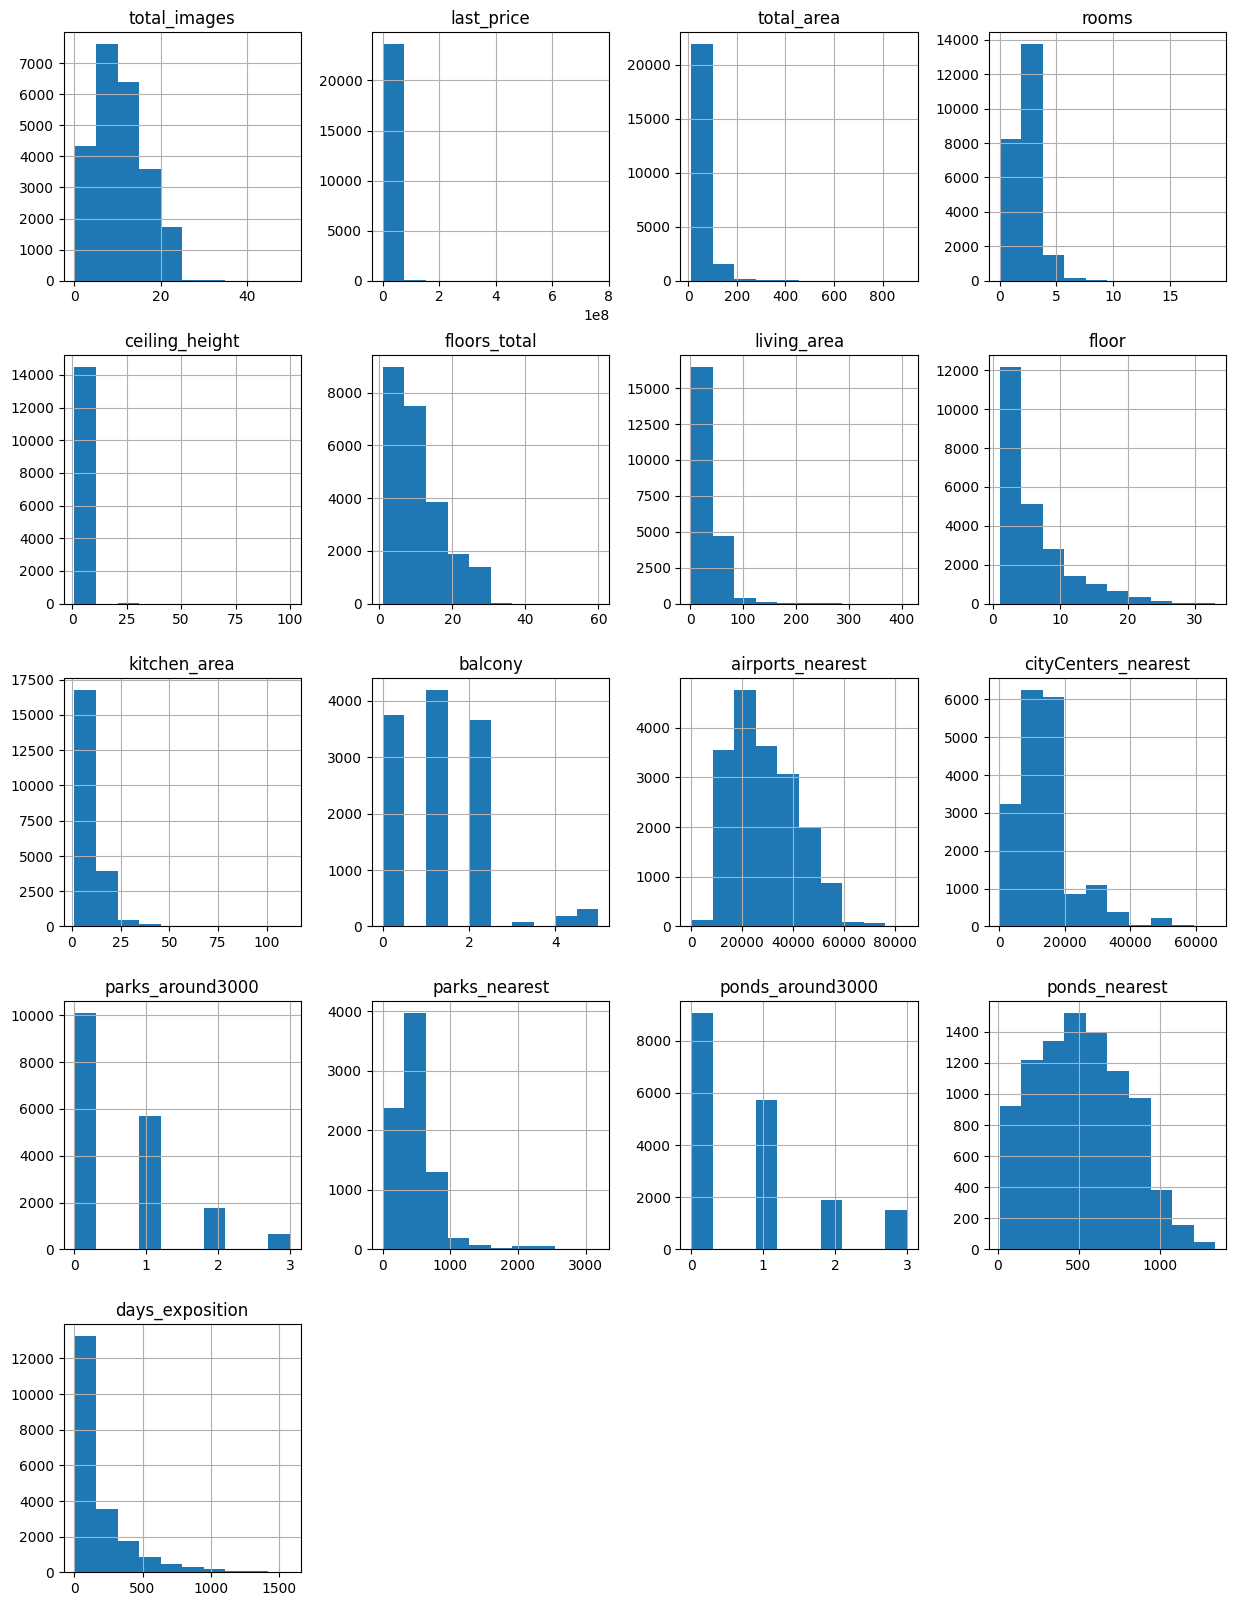

In [1635]:
df.hist(figsize=(15, 20))

База данных состоит из 23699 строк и 22 колонок. Следует обратить внимание, что столбцы first_day_exposition и is_apartment имеют тип object, хотя по значениям столбцов логично предположить, что они должны иметь тип datetime и bool соответственно. Также, столбцы floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition имеют тип данных float, однако, значения столбцов не может быть дробным, следовательно, необходимо использовать тип данных int. Также следует отметить, что датафрейм имеет пропуски, которые могут исказить результат обработки данных, следовательно, необходимо провести анализ пропусков и устранить их.

In [1636]:
#Проверим датафрейм на явные дубликаты:
print('Количество явных дубликатов', df.duplicated().sum())

Количество явных дубликатов 0


Явных дубликатов не обнаружено.

### Предобработка данных

Проведём предобработку для каждого столбца. 

**total_images:**

Количество пропущенных значений - 0
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


<AxesSubplot:>

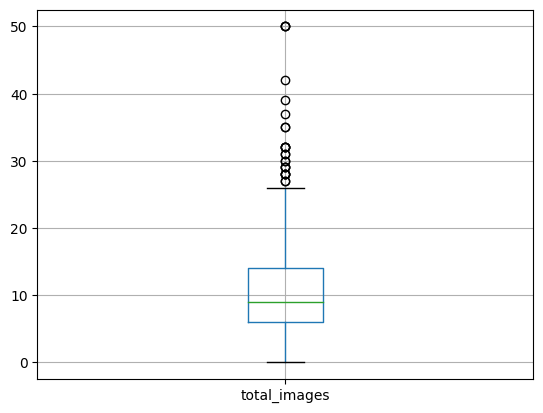

In [1637]:
print('Количество пропущенных значений -', df['total_images'].isna().sum())
print(df['total_images'].describe())
df.boxplot('total_images')


В данном столбце отсутсвуют пропущенные значения. Также, аномальные значения не выявлены. По графику можно сделать вывод, что значения выше 26 являются выбросами, однако, учитывая характер столбца, обьявление может содержать и 50 фотографий, следовательно, оставим столбец без изменений.

**last_price:**

Количество пропущенных значений - 0
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

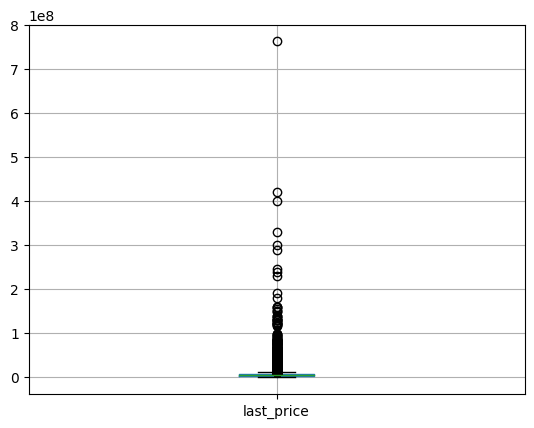

In [1638]:
print('Количество пропущенных значений -', df['last_price'].isna().sum())
print(df['last_price'].describe())
df.boxplot('last_price')

Пропущенные значения не выявлены. Аномальных значений также не обнаружено. Однако, график для данного столбца не является информативным. Изменим принцип выявления аномалий для тех столбцов, где метод boxplot не даёт необходимой информации - определим выбросы как значения, лежащие за 1 и 99 перцентилем:

In [1639]:
print(np.percentile(df['last_price'], 1))
print(np.percentile(df['last_price'], 99))

1000000.0
36000000.0


In [1640]:
#Отфильтруем датафрейм по полученным значениям:
df = df.query('1000000<=last_price<=36000000')

**total_area:**

Количество пропущенных значений - 0
count    23238.000000
mean        58.842314
std         29.484527
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64


<AxesSubplot:>

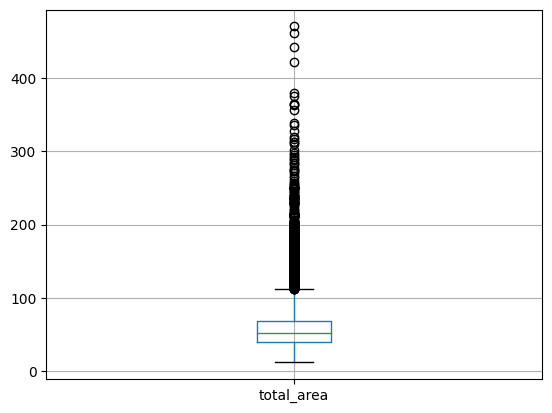

In [1641]:
print('Количество пропущенных значений -', df['total_area'].isna().sum())
print(df['total_area'].describe())
df.boxplot('total_area')

Пропущенные значения не выявлены. Аномальных значений также не обнаружено. Просчитаем 1 и 99 перцентили:

In [1642]:
print(np.percentile(df['total_area'], 1))
np.percentile(df['total_area'], 99)

25.168499999999998


170.0

In [1643]:
#Отфильтруем датафрейм по полученным значениям:
df = df.query('25.156<=total_area<=170')

**first_day_exposition:**

In [1644]:
print('Количество пропущенных значений -', df['first_day_exposition'].isna().sum())
print(df['first_day_exposition'].describe())

Количество пропущенных значений - 0
count                   22777
unique                   1488
top       2018-02-01T00:00:00
freq                      354
Name: first_day_exposition, dtype: object


Пропущенные значения не выявлены. Однако, в данном столбце хранятся значения дат, но столбец имеет тип object. Для того, чтобы в дальнейшем можно было работать с датой и определять день, месяц, год и значения времени, переведём данный столбец в формат datetime:

In [1645]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y%m%dT%H:%M:%S')

**rooms:**

Количество пропущенных значений - 0
count    22777.000000
mean         2.031479
std          0.965838
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


<AxesSubplot:>

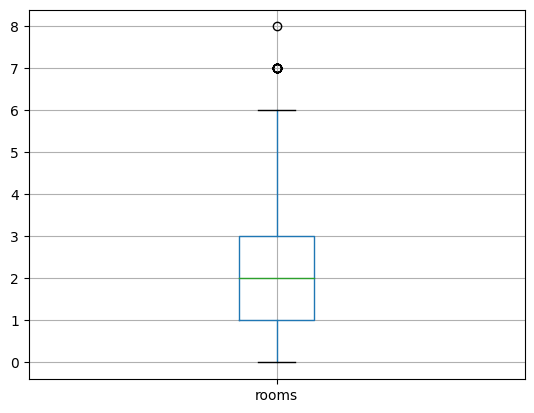

In [1646]:
print('Количество пропущенных значений -', df['rooms'].isna().sum())
print(df['rooms'].describe())
df.boxplot('rooms')

Пропущенных значений не выявлено. Однако, в столбце присутствуют значения, равные нулю, когда количество комнат в помещении должно равняться минимум 1. Следовательно, отфильтруем датафрейм на основе диаграммы размаха, начиная со значения "1":

In [1647]:
df = df.query('1<=rooms<=6')

**ceiling_height:**

Количество пропущенных значений - 8689
count    13956.000000
mean         2.752195
std          0.958989
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

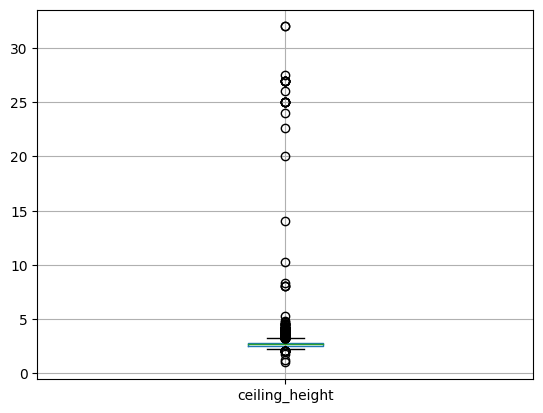

In [1648]:
print('Количество пропущенных значений -', df['ceiling_height'].isna().sum())
print(df['ceiling_height'].describe())
df.boxplot('ceiling_height')

В столбце 8671 пропущенных значений. Заполнение такого количества пропусков характерной переменной может создать выбросы. С другой стороны, определение значений в данном случае невозможно, следовательно, оставим их в датафрейме. Также, логично предположить, что высота потолка не может быть 20 метров, поэтому можно предположить, что произошла ошибка при выгрузке данных или человек забыл указать знак дроби. Чтобы исправить это поделим значения выше 20 метров на 10.

In [1649]:
df['ceiling_height'] = np.round(df['ceiling_height'].where(df['ceiling_height']<20, df['ceiling_height']/10), 2)

<AxesSubplot:>

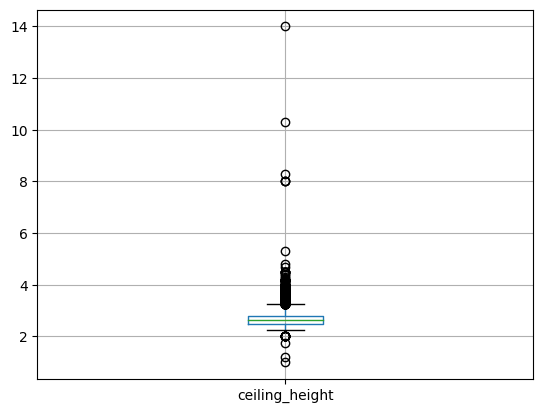

In [1650]:
#Еще раз построим диаграмму размаха
df.boxplot('ceiling_height')

Так как расчет перцентилей с пропущенными значениями невозможен, создадим отдельный датафрейм без пропущенных значений и расчитаем 1 и 99 перцентили:

In [1651]:
df_temp = df.dropna(subset=['ceiling_height']).reset_index()
print(np.percentile(df_temp['ceiling_height'], 1))
np.percentile(df_temp['ceiling_height'], 99)

2.5


3.6890000000000147

In [1652]:
#Обновим датафрейм:
df = df[((df['ceiling_height']<=3.69) & (df['ceiling_height']>=2.5)) | (df['ceiling_height'].isna())]

**floors_total:**

Количество пропущенных значений - 77
count    22353.000000
mean        10.777927
std          6.582999
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

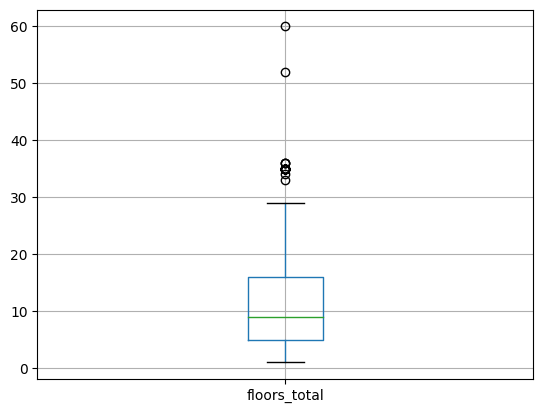

In [1653]:
print('Количество пропущенных значений -', df['floors_total'].isna().sum())
print(df['floors_total'].describe())
df.boxplot('floors_total')

В столбце присутствуют 77 пропущенных значений. Так как заполнить пропуски характерной переменной в данном случае невозможно, а также учитывая отношение числа пропусков в данном столбце к общему числу обьявлений, можем удалить данные строки. Обновим датафрейм по диаграмме размаха:

In [1654]:
df = df.dropna(subset=['floors_total'])
df = df.query('floors_total<=29')

Также следует обратить внимание, что столбец имеет тип float64, однако, этаж не может быть дробным, следовательно, заменим тип данных на int:

In [1655]:
df['floors_total'] = df['floors_total'].astype(int)

**living_area:**

Количество пропущенных значений - 1713
count    20611.000000
mean        32.808926
std         16.034672
min          2.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64


<AxesSubplot:>

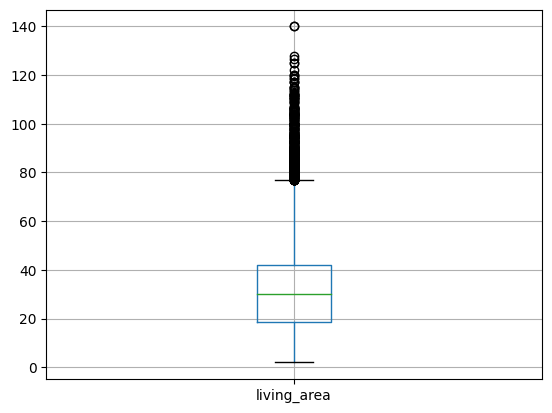

In [1656]:
print('Количество пропущенных значений -', df['living_area'].isna().sum())
print(df['living_area'].describe())
df.boxplot('living_area')

В столбце 1711 пропущенных значений. Так как значение living_area является результатом вычитания площади кухни из общей площади, заполним пропуски этим значением, где это возможно:

In [1657]:
df['living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])

In [1658]:
#воспользуемся методом перцентилей как в случае ceiling_height:
df_temp = df.dropna(subset=['living_area']).reset_index()
print(np.percentile(df_temp['living_area'], 1))
np.percentile(df_temp['living_area'], 99)

13.3478


90.0

In [1659]:
#Обновим датафрейм
df = df[((df['living_area']<=90) & (df['living_area']>=13.3)) | (df['living_area'].isna())]

**floor:**

Количество пропущенных значений - 0
count    21918.000000
mean         5.892919
std          4.849996
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64


<AxesSubplot:>

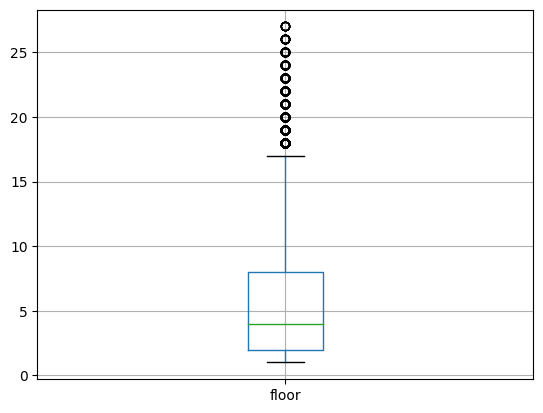

In [1660]:
print('Количество пропущенных значений -', df['floor'].isna().sum())
print(df['floor'].describe())
df.boxplot('floor')

Пропущенные значения отсутствуют. Обьявления с помещениями, находящиеся выше 17 этажа,являются редкими, поэтому ограничим этажность до 17:

In [1661]:
df = df.query('floor<=17')

**is_apartment:**

In [1662]:
print('Количество пропущенных значений -', df['is_apartment'].isna().sum())
print(df['is_apartment'].describe())

Количество пропущенных значений - 18602
count      2483
unique        2
top       False
freq       2445
Name: is_apartment, dtype: object


Данный столбец имеет формат object, однако, он обозначает буллев тип данных, следовательно, его нужно привести к формату bool  для возможности проведения арифметических операций. Также в стоблце присутствуют 18538 пропущенных значений. Учитывая, что процент коммерческой недвижимости на рынке невелик(относительно жилой недвижимости), логично заполнить пропущенные значения буллевым значением False. 

In [1663]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['is_apartment'] = df['is_apartment'].fillna(False)

**studio:**

In [1664]:
print('Количество пропущенных значений -', df['studio'].isna().sum())

Количество пропущенных значений - 0


Как было выяснено ранее при вызове метода info(), столбец studio имеет формат bool, а также в нём отсутствуют пропущенные значения, следовательно, действий со столбцом не требуется. 

**open_plan:**

In [1665]:
print('Количество пропущенных значений -', df['open_plan'].isna().sum())

Количество пропущенных значений - 0


Аналогично со столбцом studio.

**kitchen_area:**

Количество пропущенных значений - 1724
count    19361.000000
mean        10.050096
std          4.818638
min          1.300000
25%          7.000000
50%          9.000000
75%         11.350000
max         65.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

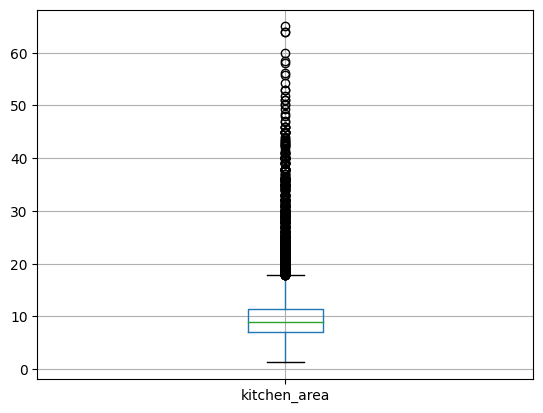

In [1666]:
print('Количество пропущенных значений -', df['kitchen_area'].isna().sum())
print(df['kitchen_area'].describe())
df.boxplot('kitchen_area')

В столбце 1718 пропущенных значений. Наблюдается ситуация, аналогичная со столбцом living_area. Так как площадь кухни определяется как общая площадь минус жилплощадь, заполним пропущенные значения разницей известных данных:

In [1667]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])

In [1668]:
df_temp = df.dropna(subset=['kitchen_area']).reset_index()
print(np.percentile(df_temp['kitchen_area'], 1))
np.percentile(df_temp['kitchen_area'], 99)

5.0


33.94130000000001

In [1669]:
#Обновим датафрейм
df = df[((df['kitchen_area']<=33.9) & (df['kitchen_area']>=5)) | (df['kitchen_area'].isna())]

**balcony:**

Количество пропущенных значений - 10103
count    10693.000000
mean         1.143271
std          1.059867
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


<AxesSubplot:>

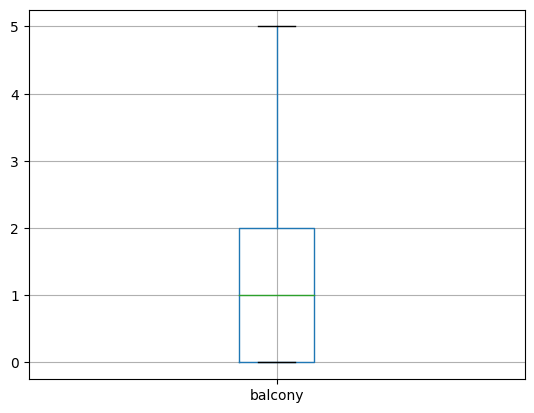

In [1670]:
print('Количество пропущенных значений -', df['balcony'].isna().sum())
print(df['balcony'].describe())
df.boxplot('balcony')

В столбце присутствуют 10 069 пропущенных значений. Логично предположить, что если человек не указал количество балконов при размещении обьявления, значит, что балкон в его помещении отсутсвует. Заменим пропуски на значение "0":

In [1671]:
df['balcony'] = df['balcony'].fillna(0)

Количество балконов не может быть дробным, следовательно, переведём тип данных в int:

In [1672]:
df['balcony'] = df['balcony'].astype(int)

<AxesSubplot:>

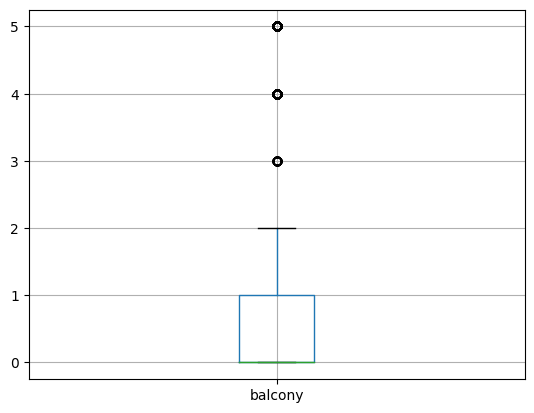

In [1673]:
#Повторно посмотрим диаграмму размаха:
df.boxplot('balcony')

Значения выше 2 приобрели редкий характер. Отфильтруем датафрейм:

In [1674]:
df = df.query('balcony<=2')

**locality_name:**

In [1675]:
print('Количество пропущенных значений -', df['locality_name'].isna().sum())
print(df['locality_name'].describe())

Количество пропущенных значений - 38
count               20282
unique                326
top       Санкт-Петербург
freq                13422
Name: locality_name, dtype: object


В столбце присутствуют 39 пропущенных значения. Так как заполнить пропуски характерной переменной в данном случае невозможно, а также учитывая отношение числа пропусков в данном столбце к общему числу обьявлений, можем удалить данные строки. Также следует обратить внимание на то, что в столбце присутсвуют 326 уникальных значений, следовательно, необходимо проанализировать датафрейм на предмет неявных дубликатов:

In [1676]:
#Удалим строки с пропущенными значениями:
df = df.dropna(subset=['locality_name']).reset_index()

In [1677]:
#Просмотрим столбец с названиями населенных пунктов на предмет неявных дубликатов:
df['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'посёлок Мурино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'село Путилово', 'Мурино', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеле

In [1678]:
#Устраним неявные дубликаты
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
 
df['locality_name'] = (df['locality_name'].str 
                       .replace('поселок городского типа ', '').str
                       .replace('деревня ', '').str
                       .replace('садовое товарищество ', '').str
                       .replace('село ', '').str
                       .replace('городской поселок ', '').str
                       .replace('поселок станции ', '').str
                       .replace('поселок при железнодорожной станции ', '').str
                       .replace('коттеджный поселок ', '').str
                       .replace('поселок ', ''))

**airports_nearest:**

Количество пропущенных значений - 4751
count    15531.000000
mean     28792.184920
std      12672.405044
min          0.000000
25%      18349.000000
50%      26933.000000
75%      37406.500000
max      84869.000000
Name: airports_nearest, dtype: float64


<AxesSubplot:>

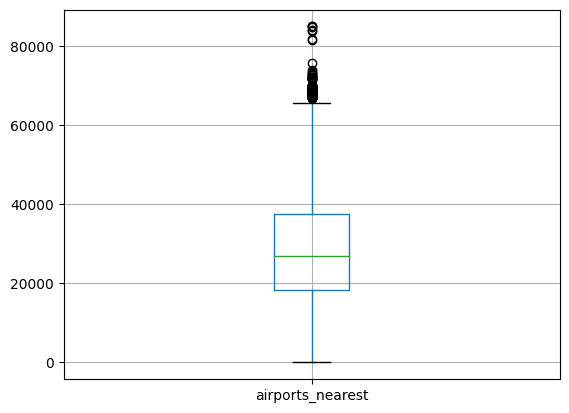

In [1679]:
print('Количество пропущенных значений -', df['airports_nearest'].isna().sum())
print(df['airports_nearest'].describe())
df.boxplot('airports_nearest')

В столбце 4758 пропущенных значений. Логично предположить, что отсутствие расстояния до аэропорта означает, что поблизости аэропорты отсутствуют. Так как эта информация может быть полезной при анализе,оставим пропущенные значения и отфильтруем датафрейм по диаграмме размаха:

In [1680]:
df = df[(df['airports_nearest']<62000)|(df['airports_nearest'].isna())]

**cityCenters_nearest:**

Количество пропущенных значений - 4732
count    15438.000000
mean     14250.930626
std       8123.368913
min        287.000000
25%       9734.000000
50%      13167.500000
75%      16236.250000
max      61495.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:>

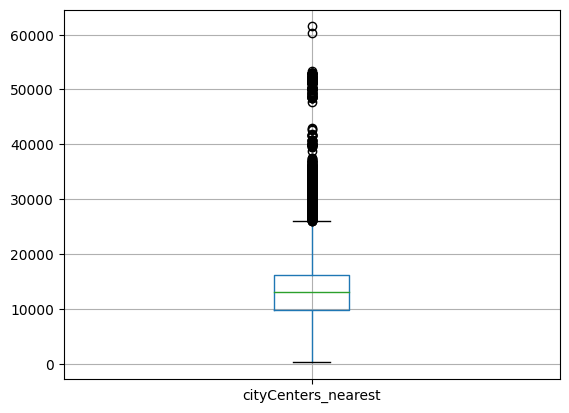

In [1681]:
print('Количество пропущенных значений -', df['cityCenters_nearest'].isna().sum())
print(df['cityCenters_nearest'].describe())
df.boxplot('cityCenters_nearest')

Так как логическая замена пропусков невозможна, оставим их в датафрейме. Так как диаграмма размаха не является информативной, а расчет перцентилей невозможен с пропущенными значениями, создадим отдельный датафрейм без пропущенных значений и расчитаем 99 перцентиль: 

In [1682]:
df_temp = df.dropna(subset=['cityCenters_nearest'])
np.percentile(df_temp['cityCenters_nearest'], 99)

40714.68999999995

In [1683]:
#Обновим датафрейм
df = df[(df['cityCenters_nearest']<40738)|(df['cityCenters_nearest'].isna())]

**parks_around3000:**

Количество пропущенных значений - 4731
count    15284.000000
mean         0.592646
std          0.778137
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


<AxesSubplot:>

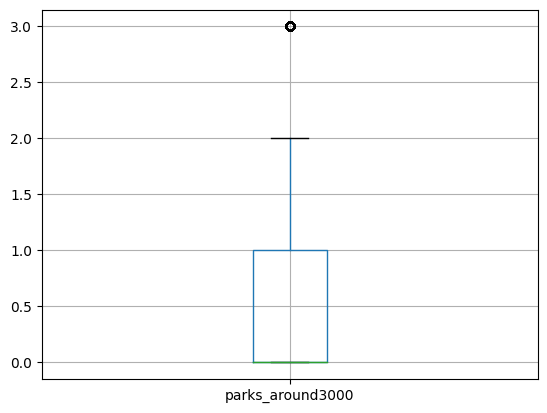

In [1684]:
print('Количество пропущенных значений -', df['parks_around3000'].isna().sum())
print(df['parks_around3000'].describe())
df.boxplot('parks_around3000')

В столбце присутствуют 4738 пропущенных значений. Логично предположить, что пропущенные значения означают отсутствие парков в радиусе 3 км. Учитывая, что заменить пропущенные значения характерной переменной невозможно, а также эти данные понадобятся для анализа, оставим их в датафрейме. Так как 3 парка уже является выбросом, ограничимся значением 2:

In [1685]:
df = df[(df['parks_around3000']<=2)|(df['parks_around3000'].isna())]

Количество парков не может быть дробным, однако, так как мы оставляем пропущенные значения (которые имеют тип float) мы не можем поменять тип данных на int.

**parks_nearest:**

Количество пропущенных значений - 13277
count    6279.000000
mean      506.441631
std       347.853399
min         1.000000
25%       306.000000
50%       470.000000
75%       627.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

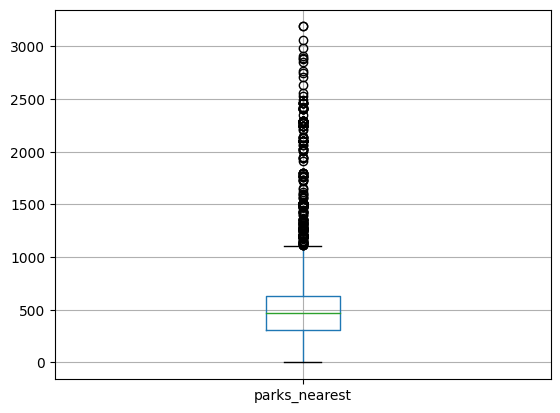

In [1686]:
print('Количество пропущенных значений -', df['parks_nearest'].isna().sum())
print(df['parks_nearest'].describe())
df.boxplot('parks_nearest')

Логично предположить, что отсутствующие значение обозначают отсутсвие парков поблизости.  Так как эта информация может быть полезной при анализе,оставим пропущенные значения. Так как диаграмма размаха не является информативной, а расчет перцентилей невозможен с пропущенными значениями, создадим отдельный датафрейм без пропущенных значений и расчитаем 99 перцентиль:

In [1687]:
df_temp = df.dropna(subset=['parks_nearest'])
np.percentile(df_temp['parks_nearest'], 99)

2137.0

In [1688]:
#Отфильтруем датафрейм:
df = df[(df['parks_nearest']<2134)|(df['parks_nearest'].isna())]

**ponds_around3000:**

Количество пропущенных значений - 4731
count    14761.000000
mean         0.700766
std          0.887480
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


<AxesSubplot:>

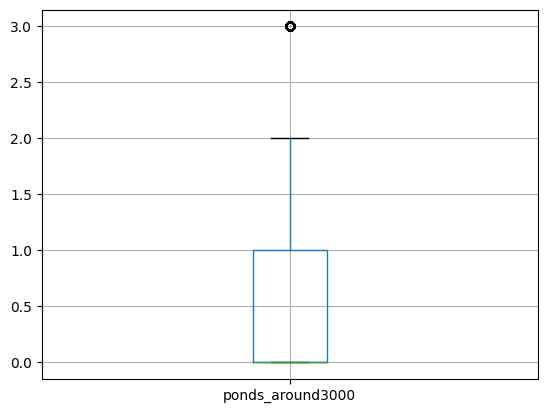

In [1689]:
print('Количество пропущенных значений -', df['ponds_around3000'].isna().sum())
print(df['ponds_around3000'].describe())
df.boxplot('ponds_around3000')

В столбце 4738 пропущенных значений. Логично предположить, что пропущенные значения обозначают отсутствие прудов в радиусе 3 км. Данная информация понадобится для анализа, следовательно, оставим её в датафрейме. Обновим датафрейм на основе данных с диаграммы размаха. Количество прудов не может быть дробным, однако, так как мы оставляем пропущенные значения (которые имеют тип float) мы не можем поменять тип данных на int.

In [1690]:
df = df[(df['ponds_around3000']<=2)|(df['ponds_around3000'].isna())]

**ponds_nearest:**

Количество пропущенных значений - 12476
count    6079.000000
mean      559.888797
std       278.342468
min        13.000000
25%       351.000000
50%       561.000000
75%       776.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


<AxesSubplot:>

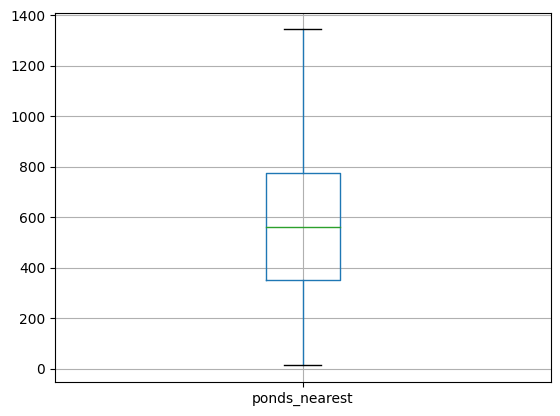

In [1691]:
print('Количество пропущенных значений -', df['ponds_nearest'].isna().sum())
print(df['ponds_nearest'].describe())
df.boxplot('ponds_nearest')

В столбце присутствуют 12483 пропущенных значений. Логично предположить, что отсутсвие значения означает отсутствие прудов поблизости. Оставим пропуски в датафрейме для последующего анализа. Аномальных значений не выявлено.

**days_exposition:**

Количество пропущенных значений - 2389
count    16166.000000
mean       174.122727
std        213.001845
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1553.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

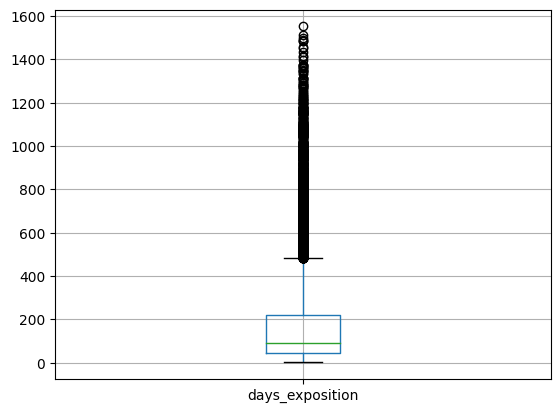

In [1692]:
print('Количество пропущенных значений -', df['days_exposition'].isna().sum())
print(df['days_exposition'].describe())
df.boxplot('days_exposition')

В столбце 2381 пропущенных значений. Скорее всего, это можно охарактеризовать ошибкой при выгрузке данных. Так как заполнить значение харакетерной переменной не получится, а значения этого столбца понадобятся для дальнейшего анализа, удалим пропущенные значения. Обьявления могли быть выставлены и сразу убраны, что может исказить результат исследований. Расчитаем первый перцентиль и возьмём его за нижнюю границу. Также, нас не интересуют обьявления, которые находятся за 99 перцентилем, так как есть вероятность, что квартира была продана, но обьявление не убрали. Также количетство дней не может быть дробным(в данном случае), следовательно, нужно поменять тип данных на int.

In [1693]:
df = df.dropna(subset=['days_exposition']).reset_index()
print(np.percentile(df['days_exposition'], 1))
np.percentile(df['days_exposition'], 99)

4.0


1046.0

In [1694]:
#Обновим датафрейм и поменяем тип данных
df = df.query('4<=days_exposition<=1046')
df['days_exposition'] = df['days_exposition'].astype(int)

**Проверим датафрейм на пропущенные значения и выведем информацию об обновлённом датафрейме:**

In [1695]:
df.isna().sum()

level_0                     0
index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           6584
floors_total                0
living_area              1042
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1042
balcony                     0
locality_name               0
airports_nearest         3951
cityCenters_nearest      3937
parks_around3000         3937
parks_nearest           11205
ponds_around3000         3937
ponds_nearest           10652
days_exposition             0
dtype: int64

In [1696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15868 entries, 0 to 16165
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   level_0               15868 non-null  int64         
 1   index                 15868 non-null  int64         
 2   total_images          15868 non-null  int64         
 3   last_price            15868 non-null  float64       
 4   total_area            15868 non-null  float64       
 5   first_day_exposition  15868 non-null  datetime64[ns]
 6   rooms                 15868 non-null  int64         
 7   ceiling_height        9284 non-null   float64       
 8   floors_total          15868 non-null  int32         
 9   living_area           14826 non-null  float64       
 10  floor                 15868 non-null  int64         
 11  is_apartment          15868 non-null  bool          
 12  studio                15868 non-null  bool          
 13  open_plan       

In [1697]:
#Обновим индексы:
df=df.reset_index(drop=True)

### Добавление параметров

Добавим столбец с ценой одного квадратного метра - для этого поделим цену(last_price) на общую площадь(total_area):

In [1698]:
df['price_per_square'] = df['last_price'] / df['total_area']

Добавим столбцы со значениями дня, месяца, года:

In [1699]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим тип этажа квартиры. Для этого напишем функцию, которая возвращает тип этажности в зависимости от значений floor и floors_total и применим её к строкам датафрейма:

In [1700]:
def floor_category(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
df['floor_type'] = df.apply(floor_category, axis = 1)

Добавим столбец с расстоянием до центра города в километрах:

In [1701]:
df['citycenter_km'] = np.round(df['cityCenters_nearest'] / 1000)

Так как в данном столбце присутствуют пропущенные значения, мы не можем перевести столбец citycenter_km в тип int.

### Исследовательский анализ данных

Построим гистограммы для основных параметров и проанализируем их:

**total_area:**

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

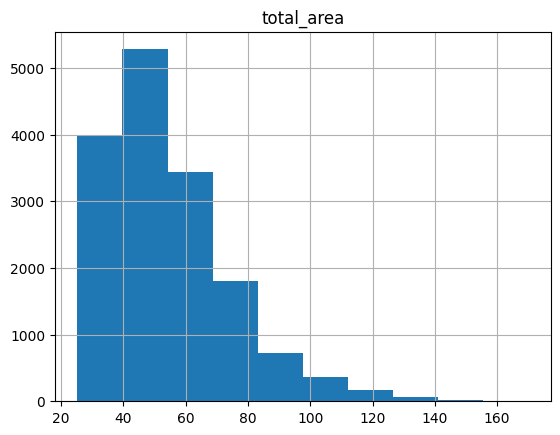

In [1702]:
df.hist('total_area')

Как видно на гистограмме, наибольшее число обьявлений с площадью 40-55 квадратных метров, чуть менее - с площадью от 25 до 40 метров квадратных и от 55 до 70 метров квадратных, и далее гистограмма имеет нисходящий характер. Даная тенденция может обьясняться законом спроса и предложения - доход среднестатестического россиянина позволяет ему приобрести квартиру от 25 до 70 квадратных метров, тогда как обьём спроса на помещения с большей площадью падает в силу роста цены.

**living_area:**

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

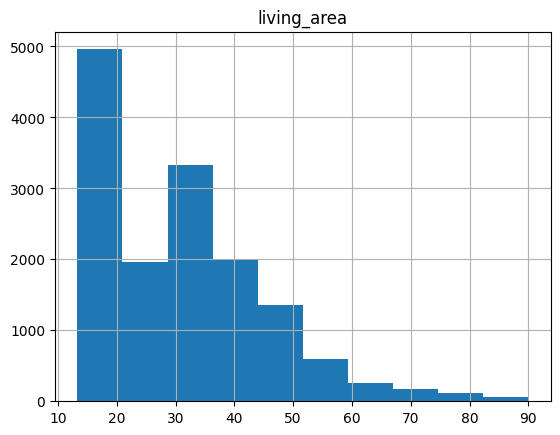

In [1703]:
df.hist('living_area')

На гистограме видны 2 пика - от 13 до 20 метров и от 27 до 35 метров. Скорее всего, данная тенденция связана с планировкой помещений - существуют типичные планировки для многоквартирных домов, следовательно, чаще всего встречаются 2 основных типа планировок.

**kitchen_area:**

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

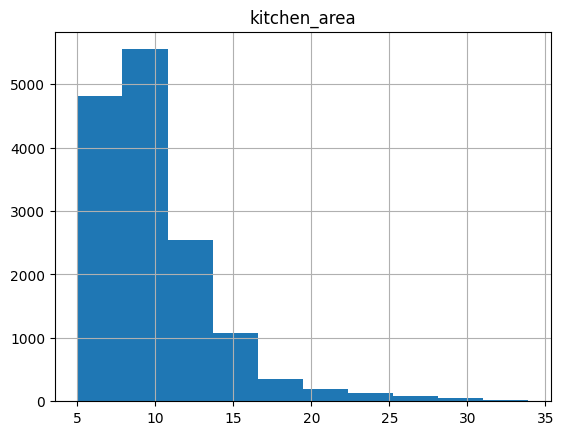

In [1704]:
df.hist('kitchen_area')

На гистограмме присутсвует пик от 7 до 10 метров. Связано это, опять-таки, с типом планировки - например, "сталинки" являются самым распространнёным типом домов, а их характерной особенностью является небольшая площадь кухни. Значения выше 22 метров практически сливаются с нулём - следовательно, помещений с такой площадью кухни достаточно малое количство.

**last_price:**

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

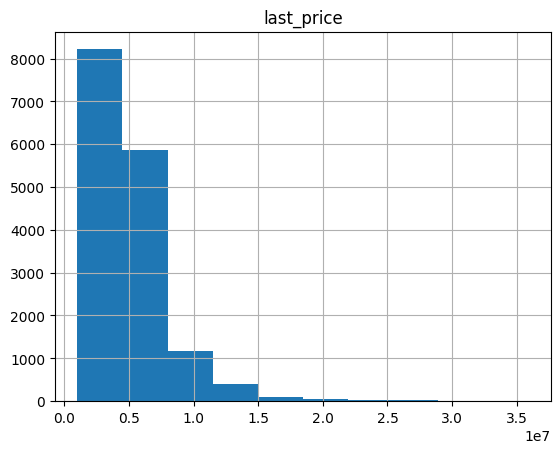

In [1705]:
df.hist('last_price')

На данной гистограме присутствует резкий скачок при значении выше 7 миллионов, что свидетельствует о том, что наибольшее количество обьявлений с ценой менее 7 млн. На данной гистограмме также отображён закон спроса и предложения - чем выше цена на помещение, тем меньше предложение(количество обьявлений). 

**rooms:**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

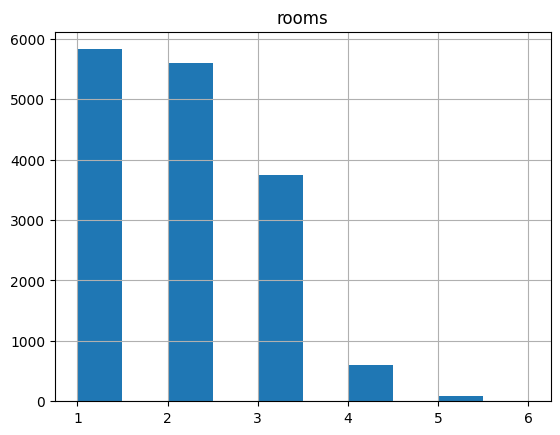

In [1706]:
df.hist('rooms')

По данной гистограме можно сделать вывод, что чем меньше комнат, тем больше количество обьявлений. Также наблюдается резкий скачок между 3 и 4 комнатами, из чего можно сделать вывод, что чаще всего встречаются помещения с количеством комнат до 3 включительно.

**ceiling_height:**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

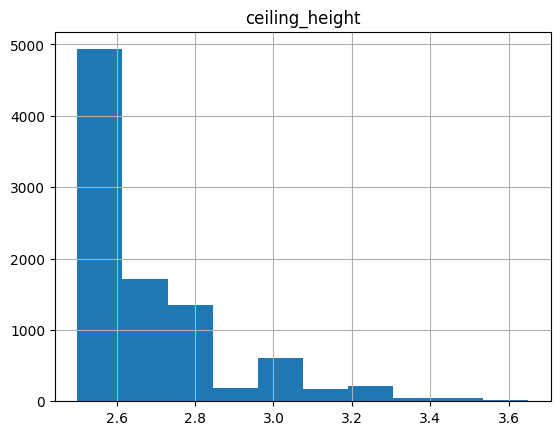

In [1707]:
df.hist('ceiling_height')

На данной гистограмме видно, что наиболее типичной высотой потолка является 2.6 метра. Высота потолков более 2.9 метров встречается довольно редко. Однако наблюдается небольшой скачок при значении 3 метра, что может свидетельствовать о том, что значения от 3.0 и 3.1 метров являются типичными для некоторых помещений, например, для домов премиум класса.

**floor:**

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

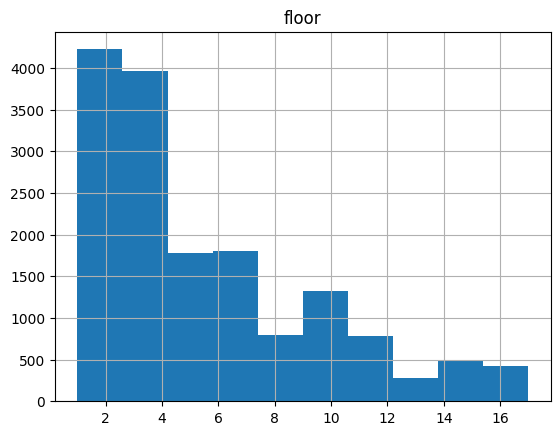

In [1708]:
df.hist('floor')

На данной гистограме видно, что чаще всего встречаются помещения, находящиеся от 1 до 4 этажей, также достаточно много помещений от 4 до 7 этажей, чуть менее - помещения, находящихся на 9-11 этажах, и куда меньше помещений на 8 этаже и в промежутке от 12 до 16 этажей. 

**floor_type:**

Так как невозможно построить гистограмму для нечисловых значений, сгруппируем датафрейм по столбцу floor_type и посчитаем количество значений для каждой категории.

In [1709]:
#Возьмём для values любой столбец без пропушенных значений для подсчёта 
df.pivot_table(index='floor_type', values='last_price', aggfunc='count')

,last_price
floor_type,
first,1992
last,2023
other,11853


Как видим, первый и последний этаж встречаются примерно одинаковое количество раз. Однако, куда больше обьявлений, где этаж имеет тип "other", то есть, помещения, не находящиеся ни на первом, ни на крайнем этаже.

**floors_total:**

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

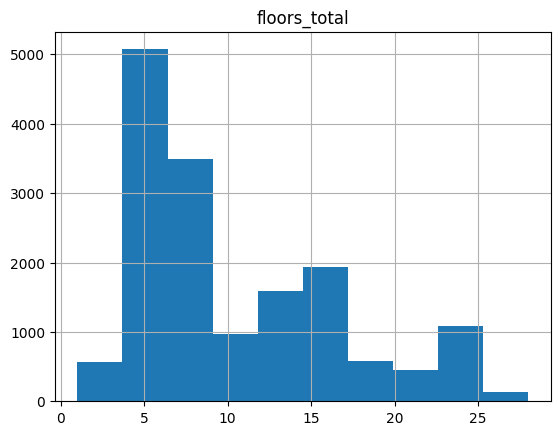

In [1710]:
df.hist('floors_total')

На гистограмме виден пик со значением 5 этажей, следовательно, логично предположить, что чаще всего помещения находятся в домах с данной этажностью. Далее гистограма не имеет нисходящюю тенденцию, что характеризуется тем, что этажность домов также имеет типчиные значения для каждого типа дома.

**cityCenters_nearest:**

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

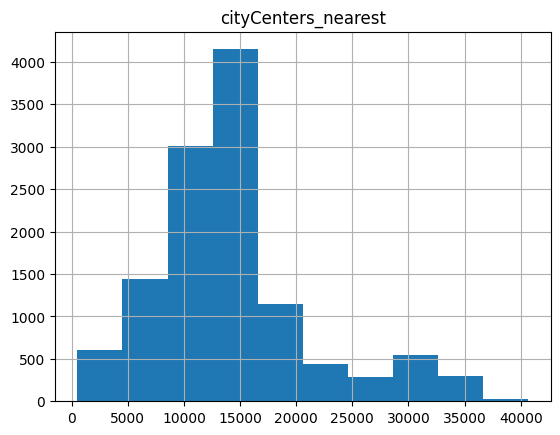

In [1711]:
df.hist('cityCenters_nearest')

На данной гистограме присутствует пик от 12500 до 16000 м, что означает, что наибольшее количество обьявлений находится на данном удалении от центра. Логично предположить, что чем ближе квартира к центру, тем больше её цена при прочих равных. Следовательно, данное расстояние является золотой серединой по соотношению цена-качество. 

**airports_nearest:**

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

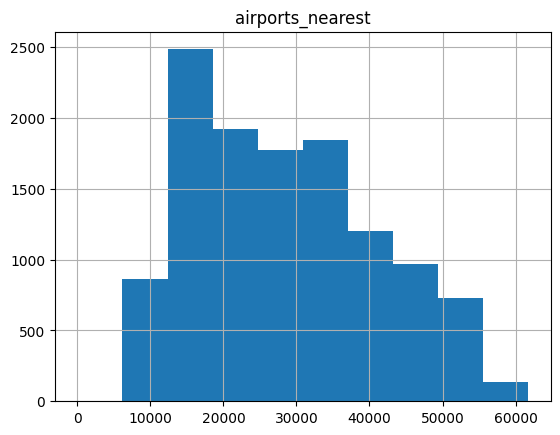

In [1712]:
df.hist('airports_nearest')

Данная гистограмма имеет нормальное распределение. Логично предположить, что дома не могут находиться совсем близко к аэродрому по соображениям безопасности (за исключением помещений, продаваемых на территории аэродрома, если такие имеются). Отсюда и пропуск от 0 до 7 км.

**parks_nearest:**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

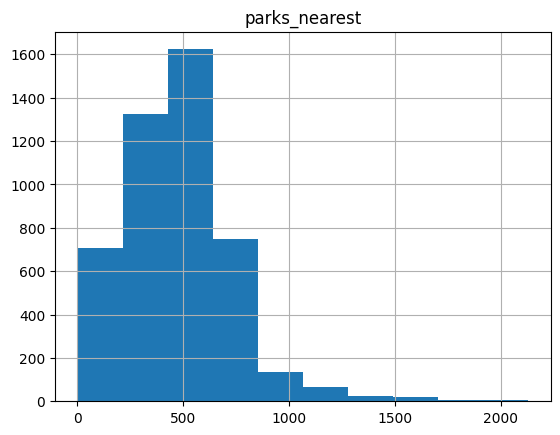

In [1713]:
df.hist('parks_nearest')

Данная гистограмма также имеет нормальное распределение. Больше всего помещений,находящихся на растоянии около 500 м от парка.

**day:**

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

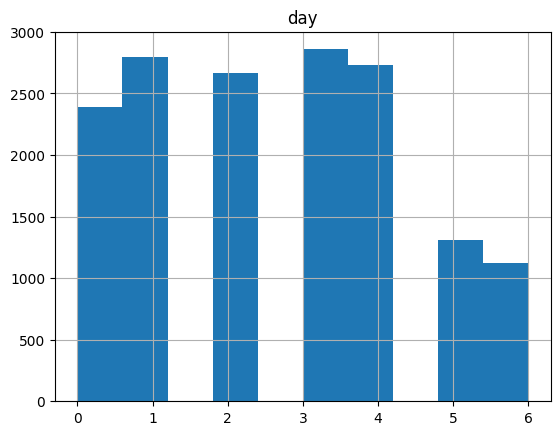

In [1714]:
df.hist('day')

Как мы видим, в рабочие дни недели(с понедельника по пятницу) выкладывают приблизительно равное количество обьявлений. В свою очередь, в выходные обьявления выкладывают куда меньше, что, скорее всего, связано с тем, что в выходные дни люди не особо хотят заниматься такими важными делами и просто отдыхают после рабочей недели.

**month:**

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

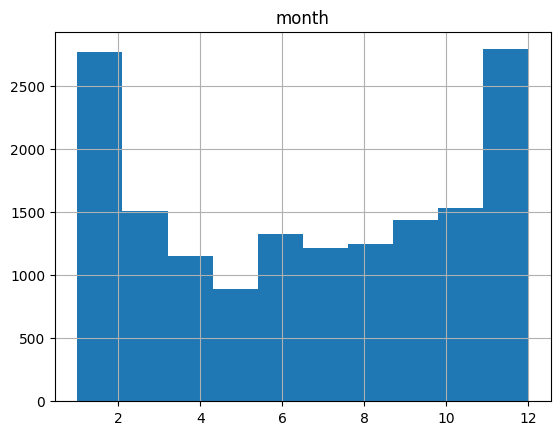

In [1715]:
df.hist('month')

Данная гистограмма показывает, что люди чаще всего выставляют обьявления в январе и декабре. В остальное же время,за исключением мая, количество обьявлений примерно одинаково. В мае наблюдается наименьшее количество выставленных обьявлений.

**days_exposition:**

count    15868.000000
mean       165.399672
std        188.156083
min          4.000000
25%         44.000000
50%         92.000000
75%        215.000000
max       1046.000000
Name: days_exposition, dtype: float64

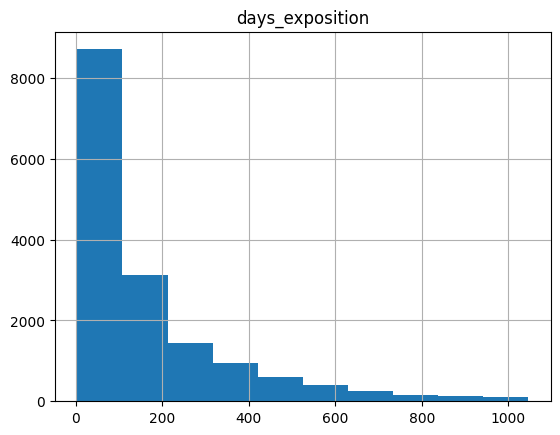

In [1716]:
df.hist('days_exposition')
df['days_exposition'].describe()

По гистограмме видно, что чаще всего помещения продаются до 90 дней(около 3 месяцев). На это также указывает и медиана. Чтобы ответить на вопрос, какие продажи можно считать быстрыми и необыкновенно долгими, построим диаграмму размаха:

<AxesSubplot:>

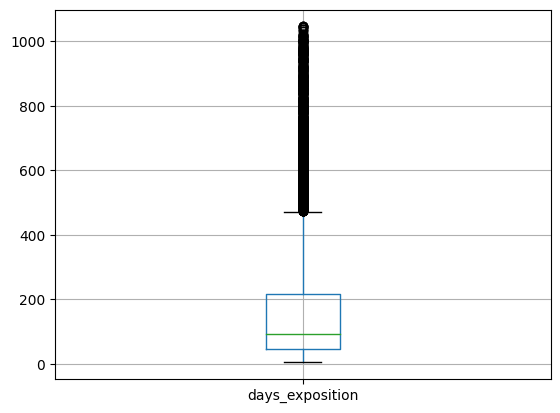

In [1717]:
df.boxplot('days_exposition')

Так как на этапе предобработки были убраны значения меньше 4 (1 перцентиля от начальных значений), обьявления, которые были сразу удалены, не входят в датафрейм. Однако, по "ящику с усами" видно, что помещения, проданные приблизительно за месяц и менее, можно считать "быстрой продажей". В свою очередь, продажи, занимающие приблизительно 7 месяцев и более являются "необычайно долгими" продажами.

**Факторы, влияющие на полную стоимость обьекта.**

Построим графики, отображающие влияние разных факторов на цену:

**total_area:**

0.7356438202357847

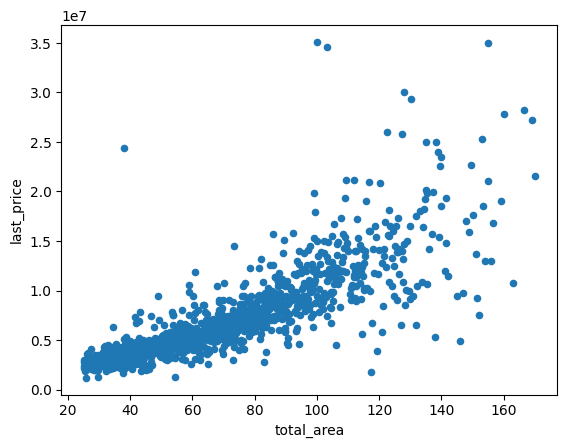

In [1718]:
df.pivot_table(index='total_area', values='last_price').reset_index().plot.scatter(x='total_area', y='last_price')
df['total_area'].corr(df['last_price'])

Так как коэффициент корреляции Пирсона составляет 0.72 можно утверждать о наличии взаимосвязи между общей площадью и ценой - с ростом одной величины растёт и другая. Это подтверждает диаграмма рассеяния.

**living_area:**

0.6140921034435076

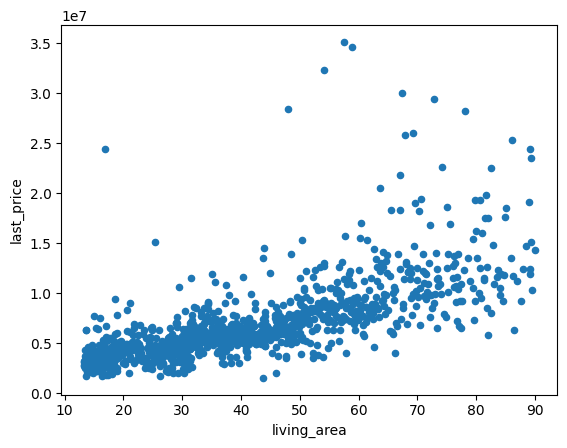

In [1719]:
df.pivot_table(index='living_area', values='last_price').reset_index().plot.scatter(x='living_area', y='last_price')
df['living_area'].corr(df['last_price'])

Корреляция в 0.57 говорит о наличии связи, однако не слишком сильной. С увеличением одного параметра увеличивается и другой, однако, не всегда.

**kitchen_area:**

0.49571420885666895

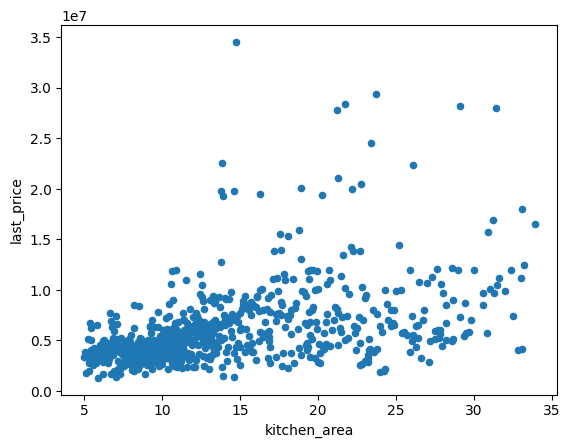

In [1720]:
df.pivot_table(index='kitchen_area', values='last_price').reset_index().plot.scatter(x='kitchen_area', y='last_price')
df['kitchen_area'].corr(df['last_price'])

Аналогично, коэффициент корреляции Пирсона указывает на наличие взаимосвязи, однако несильной.

**rooms:**

0.4489580106120797

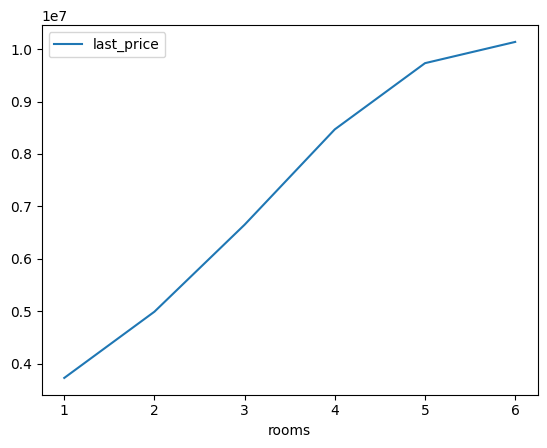

In [1721]:
df.pivot_table(index='rooms', values='last_price').reset_index().plot(x='rooms', y='last_price')
df['rooms'].corr(df['last_price'])

Коэффициент корреляции указывает на наличие взаимосвязи, но слабой. С одной стороны, логично, что 3комнатная квартира будет стоить дороже, чем 1комнатная, однако, 1комнатная квартира в Питере будет стоить дороже, чем 3комнатная в регионе. Отсюда и значение 0.44.

**floor_type:**

Так как floor_type является категориальной переменной и использование диаграммы рассеивания невозможно, построим "ящик с усами" для каждого типа:

<AxesSubplot:>

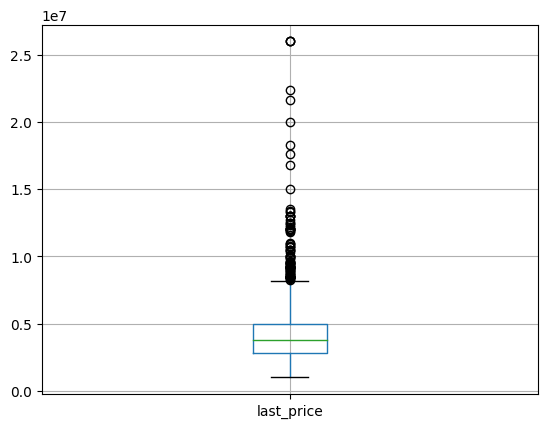

In [1722]:
df.query('floor_type=="first"').boxplot('last_price')

<AxesSubplot:>

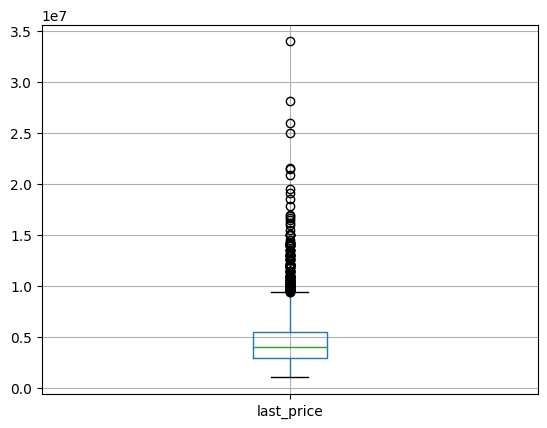

In [1723]:
df.query('floor_type=="last"').boxplot('last_price')

<AxesSubplot:>

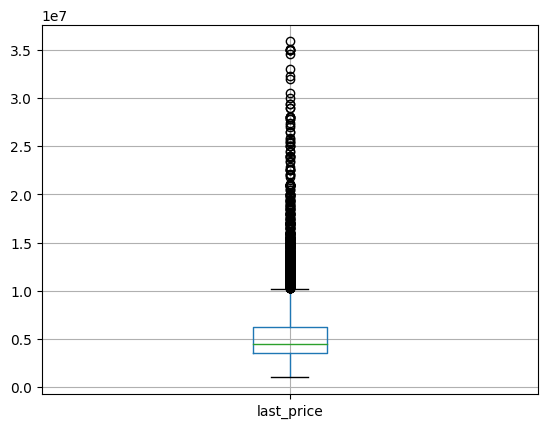

In [1724]:
df.query('floor_type=="other"').boxplot('last_price')

По распределению цены по категориям видно, что медианная цена помещения на первом этаже дешевле, чем на последнем или другом этаже, а медианная цена помещения на последнем этаже чуть дешевле цены помещения на другом этаже,но не на первом. Однако, говорить о прямой зависимости нельзя.

**day:**

C:\Users\Dodukhov\anaconda3\envs\practicum\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


-0.0005708210623210436

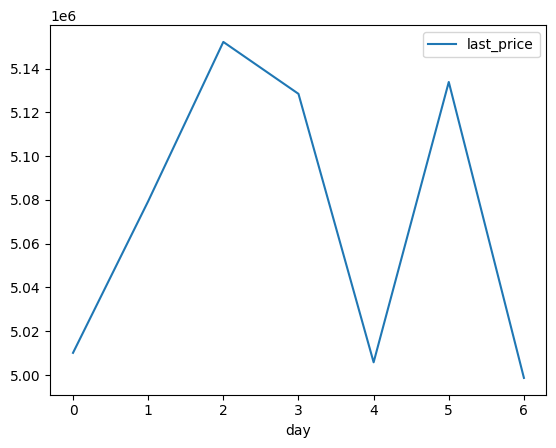

In [1725]:
df.pivot_table(index='day', values='last_price').reset_index().plot(x='day', y='last_price')
df['day'].corr(df['last_price'])

Учитывая коэффициент корреляции, можно сделать вывод, что зависимость отсутствует.

**month:**

0.011431040439595972

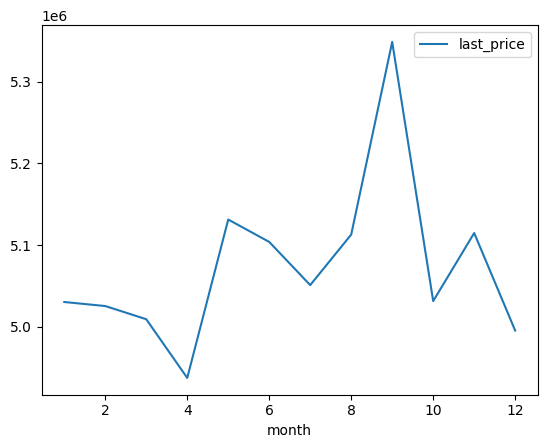

In [1726]:
df.pivot_table(index='month', values='last_price').reset_index().plot(x='month', y='last_price')
df['month'].corr(df['last_price'])

Зависимость также отсутствует.

**year:**

-0.03203371529976366

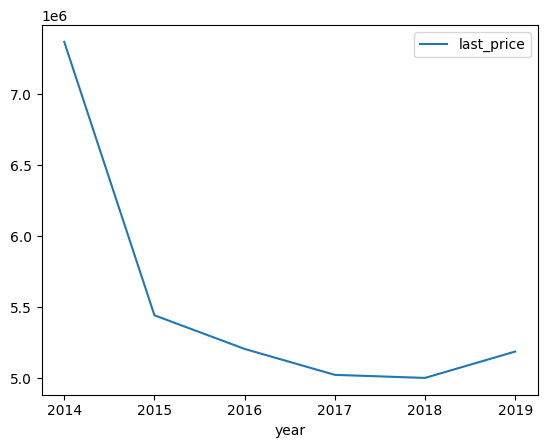

In [1727]:
df.pivot_table(index='year', values='last_price').reset_index().plot(x='year', y='last_price')
df['year'].corr(df['last_price'])

Зависимость отсутствует.

*Вывод:* Цена наиболее зависит от общей площади. Чуть менее-от площади кухни и жилплощади. Совсем немного зависит от этажности и никак не зависит от дня, месяца, года выставления обьявления.

**Средняя цена одного квадратного метра в 10 наиболее встречающихся населённых пунктах.**

Создадим список из 10 наиболее встречающихся населённых пунктов: 

In [1728]:
locality_name_max = df['locality_name'].value_counts().head(10).index
locality_name_max

Index(['Санкт-Петербург', 'Мурино', 'Шушары', 'Кудрово', 'Всеволожск',
       'Колпино', 'Гатчина', 'Пушкин', 'Парголово', 'Выборг'],
      dtype='object')

In [1729]:
#Расчитаем среднюю цену квадратного метра для этих населённых пунктов и отсортируем полученные результаты 
df.query('locality_name in @locality_name_max').pivot_table(index='locality_name', values='price_per_square').sort_values(by='price_per_square')

,price_per_square
locality_name,
Выборг,57390.235380
Гатчина,68138.814091
Всеволожск,68556.193656
Колпино,74777.806441
Шушары,76897.598665
Мурино,84085.171345
Парголово,88269.185687
Кудрово,94304.590950
Пушкин,99133.806777


Как видим, наибольшая цена за квадратный метр в Санкт-Петербурге, наименьшая - в Выборге.

**Стоимость помещений в Санкт-Петербурге в зависимости от удалённости от центра:**

<AxesSubplot:xlabel='citycenter_km'>

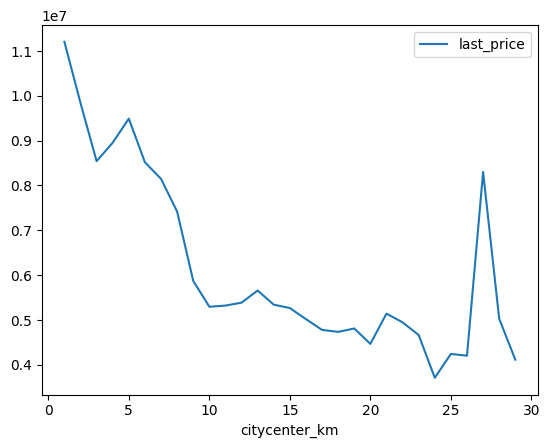

In [1730]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='citycenter_km', values='last_price').plot()

Как видно из графика, растояние до центра города и цена имеют обратную зависимость - чем ближе помещение к центру города, тем дороже его цена. На графике присутствуют отдельные скачки для некоторых значений, однако, это обьясняется тем, что цена также зависит и от других параметров - например, квартира на удалении 27 километров, но с общей площадью 100 квадратных метров может стоить также, как квартира на удалении 7 километров, но с площадью 30 квадратных метров.

### Общий вывод

Целью данной работы являлось изучение особенностей рынка недвижимости Санкт-Петербурга и ближайших населённых пунктов. Для того, чтобы результаты анализы не были искажены, в первую очередь была произведена предобработка датафрейма, состоящая в удалении пропущенных значений там, где это возможно, удалении аномальных и выбивающихся значений а также удалении дубликатов. При первичном анализе были изучены и проанализированы основные параметры недвижимости. Было выявлено, что среднее время продажи недвижимости составляет 3 месяца, а также определены "слишком быстрые" и "слишком медленные" продажи. Также анализ показал, что цена недвижимости зависит от параметров площади (больше всего - от общей площади помещения, менее-от площади кухни, жилплощади, количества комнат) и расстояния до центра города. В свою очередь, цена не зависит от даты размещения обьявления.